### 赛题理解
- 赛题名称：零基础入门NLP之新闻文本分类
- 赛题目标：通过这道赛题可以引导大家走入自然语言处理的世界，带大家接触NLP的预处理、模型构建和模型训练等知识点。
- 赛题任务：赛题以自然语言处理为背景，要求选手对新闻文本进行分类，这是一个典型的字符识别问题。

### 赛题数据
赛题以匿名处理后的新闻数据为赛题数据，数据集报名后可见并可下载。赛题数据为新闻文本，并按照字符级别进行匿名处理。整合划分出14个候选分类类别：财经、彩票、房产、股票、家居、教育、科技、社会、时尚、时政、体育、星座、游戏、娱乐的文本数据。

赛题数据由以下几个部分构成：训练集20w条样本，测试集A包括5w条样本，测试集B包括5w条样本。为了预防选手人工标注测试集的情况，我们将比赛数据的文本按照字符级别进行了匿名处理。

### 数据标签
处理后的赛题训练数据如下：
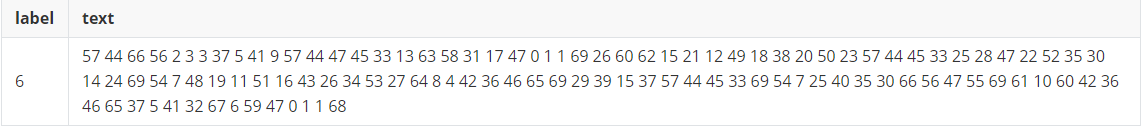
在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

### 解题思路
赛题思路分析：赛题本质是一个文本分类问题，需要根据每句的字符进行分类。但赛题给出的数据是匿名化的，不能直接使用中文分词等操作，这个是赛题的难点。

因此本次赛题的难点是需要对匿名字符进行建模，进而完成文本分类的过程。由于文本数据是一种典型的非结构化数据，因此可能涉及到特征提取和分类模型两个部分。为了减低参赛难度，我们提供了一些解题思路供大家参考：

- 思路1：TF-IDF + 机器学习分类器
直接使用TF-IDF对文本提取特征，并使用分类器进行分类。在分类器的选择上，可以使用SVM、LR、或者XGBoost。

- 思路2：FastText
FastText是入门款的词向量，利用Facebook提供的FastText工具，可以快速构建出分类器。

- 思路3：WordVec + 深度学习分类器
WordVec是进阶款的词向量，并通过构建深度学习分类完成分类。深度学习分类的网络结构可以选择TextCNN、TextRNN或者BiLSTM。

- 思路4：Bert词向量
Bert是高配款的词向量，具有强大的建模学习能力。

In [1]:
import pandas as pd
import numpy as np


In [11]:
?pd.read_csv

In [13]:
train_df = pd.read_csv('data/train_set/train_set.csv', sep='\t', nrows=100)

In [14]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [16]:
train_df['text_len']= train_df['text'].apply(lambda x : len(x.split(' ')))

In [17]:
train_df['text_len'].value_counts()

585     2
703     2
983     2
408     2
489     2
       ..
795     1
3131    1
857     1
238     1
149     1
Name: text_len, Length: 95, dtype: int64

In [18]:
train_df['text_len'].describe()

count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64

Text(0.5, 1.0, 'Histogram of char count')

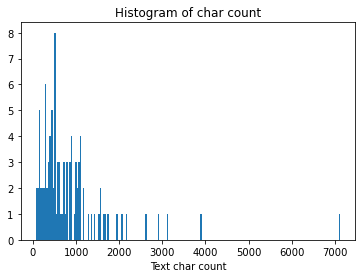

In [20]:
import matplotlib.pyplot as plt

_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")